# **Import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

# **CIFAR10**

In [ ]:
(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [ ]:
print(X_train[0].shape)
print(X_train[0])

(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[3]')

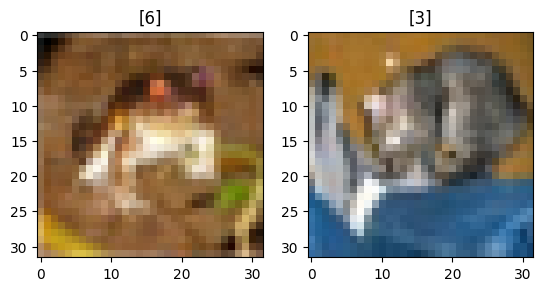

In [ ]:
from matplotlib import pyplot as plt 

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.title(y_train[0])

plt.subplot(1,2,2)
a=X_test[0]
plt.imshow(a)
plt.title(y_test[0])

In [ ]:
#make a input vector so we 
#reshape it into input format for training and testing sets. After that change all datatypes into floats

# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train=np_utils.to_categorical(y_train, n_classes)
y_test=np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


# **Resnet50 pre-trained Model**

In [ ]:
# Define the ResNet50 model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
# Add a dropout layer to prevent overfitting
dropout1 = Dropout(rate=0.25, name='dropout1')(x)
x = Dense(128, activation='relu')(dropout1)
predictions = Dense(10, activation='softmax')(x)
model_1= Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Data augmentation algorithm
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
# Train the model
epochs=50
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model_1.fit(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128,
                    validation_data=(X_test,y_test),
                    epochs=epochs)

Epoch 1/50
390/390 [==============================] - 104s 122ms/step - loss: 1.4453 - accuracy: 0.5121 - val_loss: 3.4272 - val_accuracy: 0.1000
Epoch 2/50
390/390 [==============================] - 41s 105ms/step - loss: 1.0419 - accuracy: 0.6533 - val_loss: 2.2223 - val_accuracy: 0.3215
Epoch 3/50
390/390 [==============================] - 43s 110ms/step - loss: 0.9165 - accuracy: 0.6946 - val_loss: 2.3379 - val_accuracy: 0.6080
Epoch 4/50
390/390 [==============================] - 42s 109ms/step - loss: 0.8997 - accuracy: 0.6993 - val_loss: 1.4036 - val_accuracy: 0.5853
Epoch 5/50
390/390 [==============================] - 45s 115ms/step - loss: 0.8138 - accuracy: 0.7266 - val_loss: 0.9597 - val_accuracy: 0.7018
Epoch 6/50
390/390 [==============================] - 44s 114ms/step - loss: 0.7628 - accuracy: 0.7460 - val_loss: 0.8349 - val_accuracy: 0.7279
Epoch 7/50
390/390 [==============================] - 45s 114ms/step - loss: 0.7345 - accuracy: 0.7541 - val_loss: 1.5811 - val_a

In [ ]:
# record the training and validation accuracy and loss after each epoch
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


print("The val accuracy of cifar10 is ",max(val_acc))

# save the training log in a file
with open('Cifar10_report.txt', 'w') as f:
    for i in range(len(train_acc)):
        f.write("Epoch {}: train_acc = {}, train_loss = {}, val_acc = {}, val_loss = {}\n".format(
            i+1, train_acc[i], train_loss[i], val_acc[i], val_loss[i]))

The val accuracy of cifar10 is  0.8446999788284302


# **Cltech-101**

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.optimizers import Adam,SGD
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Import data into tensorflow dataset object

In [ ]:
import tensorflow as tf

# Set the path to your dataset directory
data_dir = "/content/drive/MyDrive/caltech-101/101_ObjectCategories/101_ObjectCategories"

IMAGE_SIZE = 256
BATCH_SIZE =32

# Load the entire dataset using tf.keras.preprocessing.image_dataset_from_directory()
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 9144 files belonging to 102 classes.


In [ ]:
# Get the class names from the dataset
class_names = dataset.class_names
class_names

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

# Visualize some of the images from our dataset

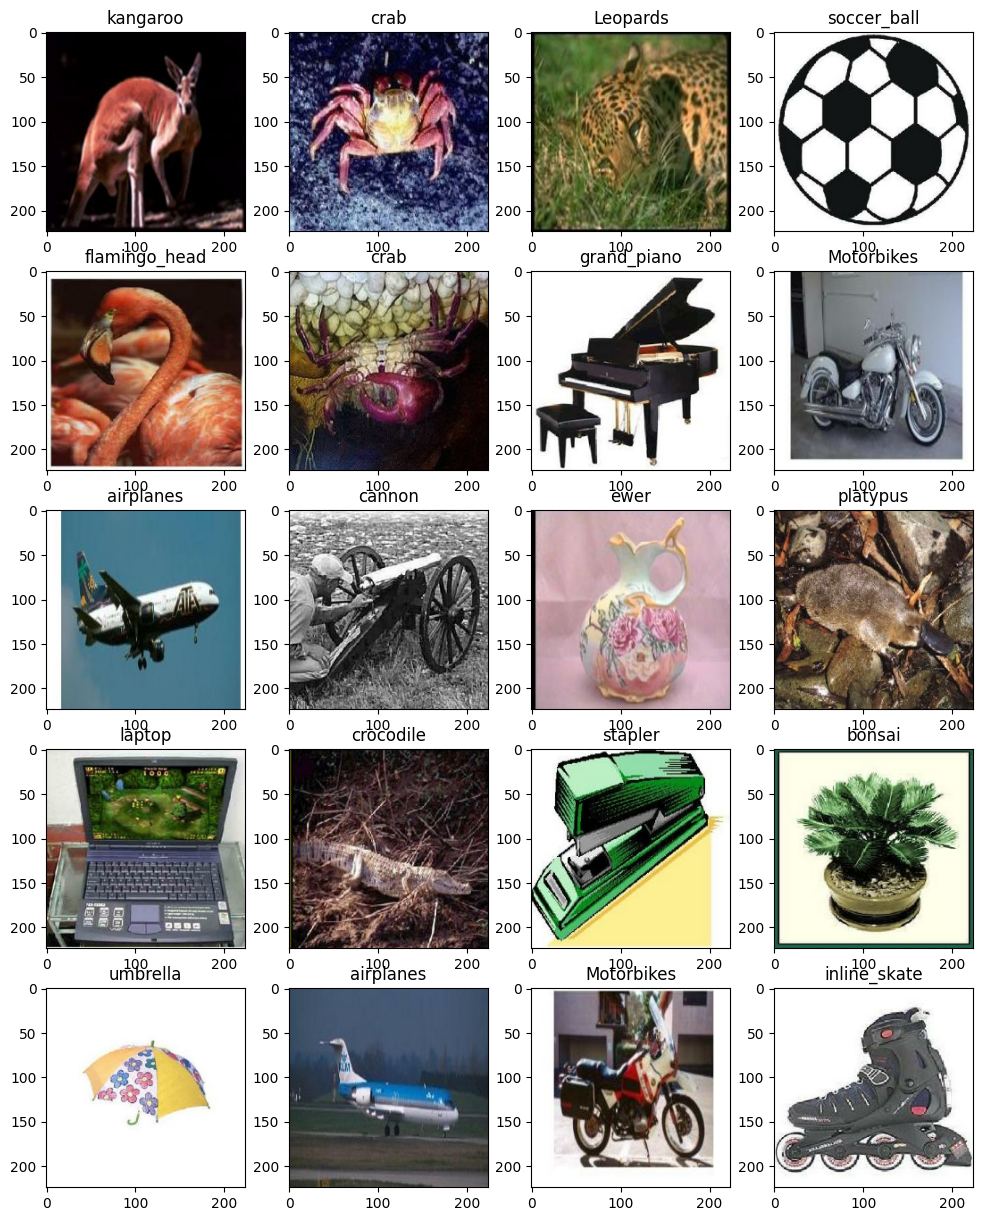

In [ ]:
## let's see the images that exist in our first batch of data
plt.figure(figsize=(12, 15))
for image_batch,label_batch in dataset.take(1):
  for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

# **Split dataset**

In [ ]:
# define number of images that we have to pick 
num_images=30

train_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices((x, y)))
# train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.take(num_images*101)
train_dataset = train_dataset.batch(BATCH_SIZE)

test_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices((x, y)))
test_dataset = test_dataset.skip(num_images*101)
test_dataset = test_dataset.batch(BATCH_SIZE)

# **data augmentation**

In [ ]:
import keras

In [ ]:
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    # Randomly rotate the image between -15 and 15 degrees
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
    # Randomly flip the image horizontally and vertically
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'),
    # Randomly adjust the contrast of the image between 0.8 and 1.2
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    # Randomly translate the image between -10% and 10% in the horizontal and vertical directions
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
    # Randomly zoom into the image between 80% and 120% of its original size
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

# Apply the data augmentation pipeline to the train_ds
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
# Apply the data trasformation pipeline to the test_dataset
test_dataset = test_dataset.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
)

# **Resnet50 pre-trained Model**

In [ ]:
# Define the ResNet50 model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
dropout1 = Dropout(rate=0.5, name='dropout1')(x)
x = Dense(256, activation='relu')(dropout1)

# Add a dropout layer to prevent overfitting
dropout2 = Dropout(rate=0.5, name='dropout2')(x)
x = Dense(128, activation='relu')(dropout2)
predictions = Dense(102, activation='softmax')(x)


model_2= Model(inputs=base_model.input, outputs=predictions)


opt= Adam(learning_rate=0.0009)
model_2.compile(optimizer =opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
,metrics = ['acc'])

In [ ]:
epochs=50
history = model_2.fit(train_dataset,
                      validation_data =test_dataset,
                      batch_size=64,
                      epochs =50)

Epoch 1/50
95/95 [==============================] - 245s 2s/step - loss: 5.3895 - acc: 0.1373 - val_loss: 3.7294 - val_acc: 0.2486
Epoch 2/50
95/95 [==============================] - 225s 2s/step - loss: 3.8639 - acc: 0.2254 - val_loss: 3.5355 - val_acc: 0.2887
Epoch 3/50
95/95 [==============================] - 226s 2s/step - loss: 3.7396 - acc: 0.2389 - val_loss: 3.4738 - val_acc: 0.2957
Epoch 4/50
95/95 [==============================] - 226s 2s/step - loss: 3.6941 - acc: 0.2488 - val_loss: 3.4581 - val_acc: 0.3031
Epoch 5/50
95/95 [==============================] - 276s 3s/step - loss: 3.6668 - acc: 0.2469 - val_loss: 3.4462 - val_acc: 0.3067
Epoch 6/50
95/95 [==============================] - 225s 2s/step - loss: 3.5500 - acc: 0.2647 - val_loss: 3.3600 - val_acc: 0.3117
Epoch 7/50
95/95 [==============================] - 225s 2s/step - loss: 3.5094 - acc: 0.2756 - val_loss: 3.3519 - val_acc: 0.3186
Epoch 8/50
95/95 [==============================] - 220s 2s/step - loss: 3.4853 - a

In [ ]:
# record the training and validation accuracy and loss after each epoch
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']


print("The val accuracy of Cltech-101 is ",max(val_acc))
# save the training log in a file
with open('Cltech-101_report.txt', 'w') as f:
    for i in range(len(train_acc)):
        f.write("Epoch {}: train_acc = {}, train_loss = {}, val_acc = {}, val_loss = {}\n".format(
            i+1, train_acc[i], train_loss[i], val_acc[i], val_loss[i]))

The val accuracy of Cltech-101 is  0.37209683656692505


# Plot the training and validation errors vs. epochs.

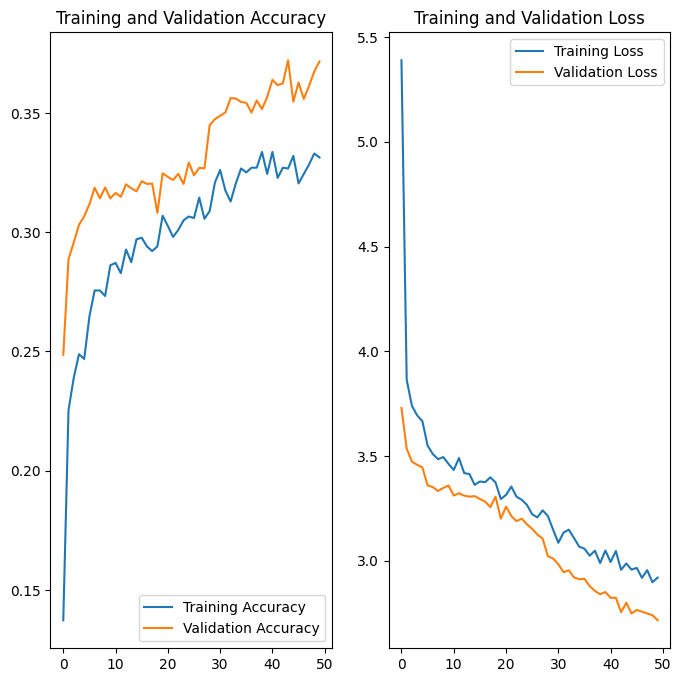

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label: emu
1/1 [==============================] - 1s 1s/step
predicted label: BACKGROUND_Google


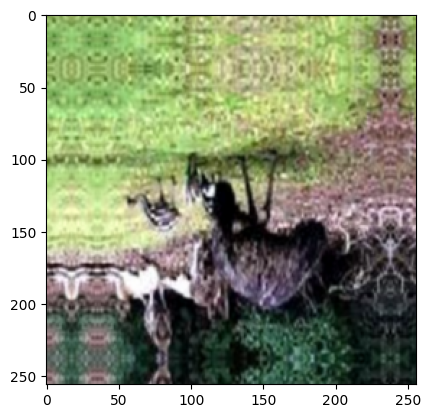

In [ ]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model_2.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

1/1 [==============================] - 0s 28ms/step


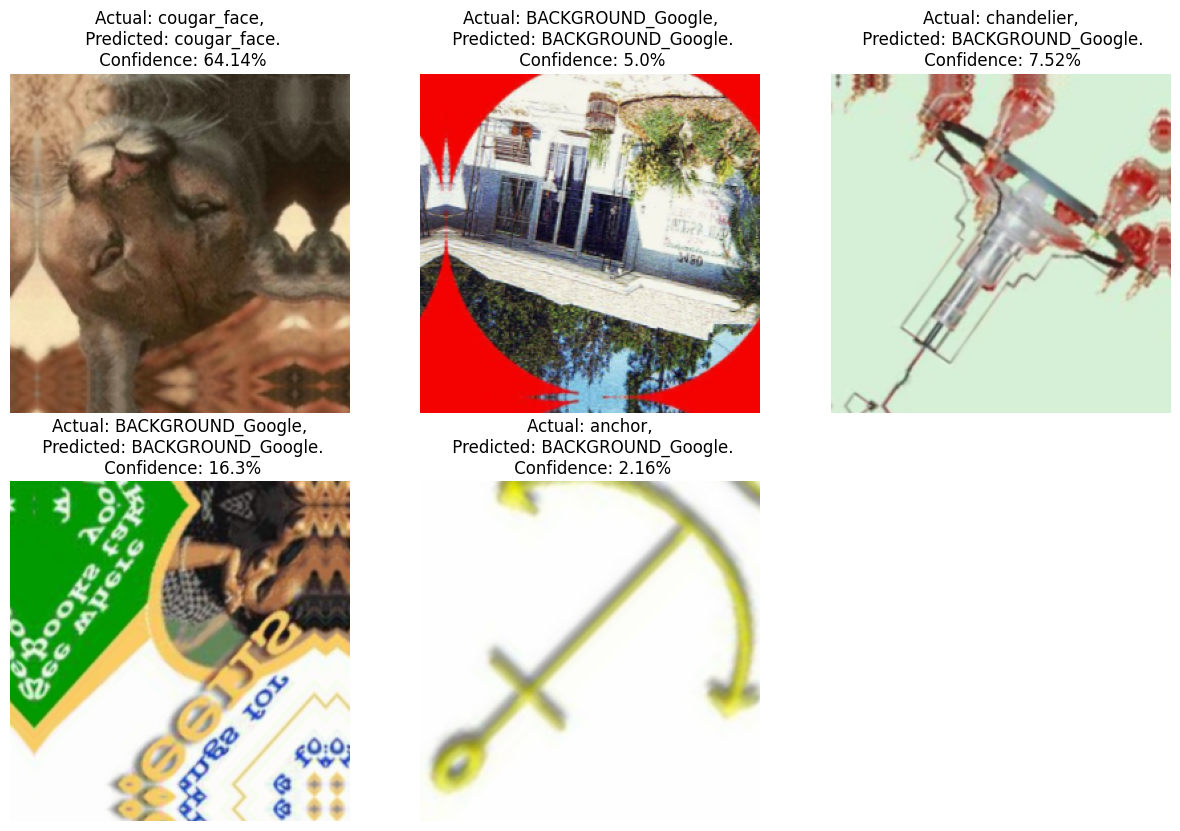

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model_2, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# **Caltech256**

In [ ]:
BATCH_SIZE =32
IMAGE_SIZE =256
CHANNELS=3
EPOCHS=50

In [ ]:
import tensorflow as tf

# Set the path to your dataset directory
data_dir = "/content/drive/MyDrive/256_ObjectCategories"

# Load the entire dataset using tf.keras.preprocessing.image_dataset_from_directory()
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 30607 files belonging to 257 classes.


In [ ]:
# Get the class names from the dataset
class_names = dataset.class_names
class_names

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

# **let's visulize some images**

In [ ]:
## let's see the images that exist in our first batch of data
plt.figure(figsize=(12, 15))
for image_batch,label_batch in dataset.take(1):
  for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

# **Split data**

In [ ]:
# define number of images that we have to pick 
num_images=30

train_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices((x, y)))
# train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.take(num_images*101)
train_dataset = train_dataset.batch(BATCH_SIZE)

test_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices((x, y)))
test_dataset = test_dataset.skip(num_images*101)
test_dataset = test_dataset.batch(BATCH_SIZE)

# **data augmentation**

In [ ]:
import keras

# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    # Randomly rotate the image between -15 and 15 degrees
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
    # Randomly flip the image horizontally and vertically
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'),
    # Randomly adjust the contrast of the image between 0.8 and 1.2
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

# Apply the data augmentation pipeline to the train_ds
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
# Apply the data trasformation pipeline to the test_dataset
test_dataset = test_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

# **Resnet50 pre-trained Model**

In [ ]:
# Define the ResNet50 model architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
dropout1 = Dropout(rate=0.4, name='dropout1')(x)
predictions = Dense(512, activation='softmax')(dropout1)
dropout1 = Dropout(rate=0.4, name='dropout1')(x)
predictions = Dense(257, activation='softmax')(dropout1)

model_3= Model(inputs=base_model.input, outputs=predictions)


opt=Adam(learning_rate=0.009)
model_3.compile(optimizer =opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
,metrics = ['acc'])

In [ ]:
epochs=10
history = model_3.fit(train_dataset, validation_data =test_dataset,
                      batch_size=128,
                      epochs =epochs)

Epoch 1/10
95/95 [==============================] - 383s 4s/step - loss: 386.5593 - acc: 0.1835 - val_loss: 347.8811 - val_acc: 0.2773
Epoch 2/10
95/95 [==============================] - 419s 4s/step - loss: 209.5472 - acc: 0.4690 - val_loss: 349.5118 - val_acc: 0.3287
Epoch 3/10
95/95 [==============================] - 370s 4s/step - loss: 161.5932 - acc: 0.5848 - val_loss: 373.2570 - val_acc: 0.3514
Epoch 4/10
95/95 [==============================] - 372s 4s/step - loss: 132.3555 - acc: 0.6630 - val_loss: 386.9339 - val_acc: 0.3744
Epoch 5/10
95/95 [==============================] - 370s 4s/step - loss: 109.4086 - acc: 0.7172 - val_loss: 408.5460 - val_acc: 0.3880
Epoch 6/10
95/95 [==============================] - 374s 4s/step - loss: 93.5758 - acc: 0.7564 - val_loss: 389.5606 - val_acc: 0.4145
Epoch 7/10
95/95 [==============================] - 374s 4s/step - loss: 83.3868 - acc: 0.7805 - val_loss: 426.2306 - val_acc: 0.4127
Epoch 8/10
95/95 [==============================] - ETA: 

In [ ]:
# record the training and validation accuracy and loss after each epoch
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']


print("The val accuracy of Cltech-256 is ",max(train_acc))
# save the training log in a file
with open('Cltech-256_report.txt', 'w') as f:
    for i in range(len(train_acc)):
        f.write("Epoch {}: train_acc = {}, train_loss = {}, val_acc = {}, val_loss = {}\n".format(
            i+1, train_acc[i], train_loss[i], val_acc[i], val_loss[i]))

The val accuracy of Cltech-256 is  0.8445544838905334


In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **predictions on test dataset samples**

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model_3, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [1]:
Top_1_accuracy=(84+37+84)/3
Top_1_accuracy

68.33333333333333